<a href="https://colab.research.google.com/github/Adarshraj06/Employee-Attrition-Predictor/blob/main/Employee_Attrition_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [117]:
import pandas as pd
df = pd.read_csv('/content/employee_attrition_ - employee_attrition_impure.csv.csv')
df.head()

,MonthlyIncome,Age,JobSatisfaction,YearsAtCompany,OverTime,Attrition
0,13191.0,41.0,4.0,1.0,Yes,1.0
1,15859.0,44.0,4.0,17.0,Yes,0.0
2,9014.0,28.0,1.0,NaN,No,NaN
3,4936.0,NaN,1.0,NaN,No,NaN
4,3885.0,27.0,4.0,0.0,Yes,1.0


In [118]:
# Dataset Overview
print("Shape of the dataset:", df.shape)

print("\nColumns:\n", df.columns.tolist())

print("\nMetadata Info:",end=" ")
print(df.info())

print("\nSummary Statistics:")
df.describe(include='all')

Shape of the dataset: (200, 6)

Columns:
 ['MonthlyIncome', 'Age', 'JobSatisfaction', 'YearsAtCompany', 'OverTime', 'Attrition']

Metadata Info: <class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MonthlyIncome    181 non-null    float64
 1   Age              180 non-null    float64
 2   JobSatisfaction  182 non-null    float64
 3   YearsAtCompany   182 non-null    float64
 4   OverTime         200 non-null    object 
 5   Attrition        181 non-null    float64
dtypes: float64(5), object(1)
memory usage: 9.5+ KB
None

Summary Statistics:


,MonthlyIncome,Age,JobSatisfaction,YearsAtCompany,OverTime,Attrition
count,181.000000,180.000000,182.000000,182.000000,200,181.000000
unique,NaN,NaN,NaN,NaN,2,NaN
top,NaN,NaN,NaN,NaN,No,NaN
freq,NaN,NaN,NaN,NaN,102,NaN
mean,12891.550990,42.725957,2.887068,10.935620,NaN,0.676326
std,7385.406267,15.330312,1.701058,8.686150,NaN,0.751718
min,3002.000000,22.000000,1.000000,0.000000,NaN,0.000000
25%,7478.000000,32.750000,2.000000,5.000000,NaN,0.000000
50%,12331.000000,41.000000,3.000000,9.000000,NaN,1.000000
75%,16365.000000,49.000000,4.000000,15.000000,NaN,1.000000


In [119]:
# missing values and unique values
print("\nMissing Values:")
print(df.isnull().sum())

print("\nUnique Values:")
for col in df.columns:
    print(f"- {col}: {df[col].nunique()} unique values")


Missing Values:
MonthlyIncome      19
Age                20
JobSatisfaction    18
YearsAtCompany     18
OverTime            0
Attrition          19
dtype: int64

Unique Values:
- MonthlyIncome: 172 unique values
- Age: 39 unique values
- JobSatisfaction: 5 unique values
- YearsAtCompany: 21 unique values
- OverTime: 2 unique values
- Attrition: 3 unique values


In [120]:
df = df.dropna(subset=['Attrition'])
df.loc[:, 'Attrition'] = df['Attrition'].astype(int)
df = df[df['Attrition'].isin([0, 1])]

# Verify the changes
print("\nShape after dropping rows with missing Attrition:", df.shape)
print("\nMissing Values after dropping rows with missing Attrition:")
print(df.isnull().sum())


Shape after dropping rows with missing Attrition: (171, 6)

Missing Values after dropping rows with missing Attrition:
MonthlyIncome      17
Age                15
JobSatisfaction    15
YearsAtCompany     12
OverTime            0
Attrition           0
dtype: int64


In [121]:
cols_to_fill = ['MonthlyIncome', 'Age', 'JobSatisfaction', 'YearsAtCompany']

for col in cols_to_fill:
    median_value = df[col].median()
    df[col] = df[col].fillna(median_value)

In [122]:
# Encoding the OverTime column
df['OverTime'] = df['OverTime'].fillna(df['OverTime'].mode()[0])
df['OverTime'] = df['OverTime'].map({'Yes': 1, 'No': 0})
print(df['OverTime'].isnull().sum())

0


In [123]:
# Split features and target
X = df[['MonthlyIncome', 'Age', 'JobSatisfaction', 'YearsAtCompany', 'OverTime']]
y = df['Attrition']

print("\nShape of features (X):", X.shape)
print("Shape of target (y):", y.shape)


Shape of features (X): (171, 5)
Shape of target (y): (171,)


In [124]:
# Train-Test Split
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # 80/20 split

print("\nShape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (136, 5)
Shape of X_test: (35, 5)
Shape of y_train: (136,)
Shape of y_test: (35,)


In [125]:
# Feature Scaling (for Logistic Regression only)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [126]:
print("Missing values in X_train:\n", X_train.isnull().sum())
print("\nMissing values in X_test:\n", X_test.isnull().sum())

Missing values in X_train:
 MonthlyIncome      0
Age                0
JobSatisfaction    0
YearsAtCompany     0
OverTime           0
dtype: int64

Missing values in X_test:
 MonthlyIncome      0
Age                0
JobSatisfaction    0
YearsAtCompany     0
OverTime           0
dtype: int64


In [127]:
#  Train & Evaluate Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the Logistic Regression model,Train model and predict on the test data
logreg = LogisticRegression(random_state=42, max_iter=1000)
logreg.fit(X_train_scaled, y_train)
y_pred = logreg.predict(X_test_scaled)

# Evaluate the model
print("\nLogistic Regression Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Logistic Regression Evaluation:
Accuracy: 0.37142857142857144
Classification Report:
               precision    recall  f1-score   support

         0.0       0.33      0.10      0.15        20
         1.0       0.38      0.73      0.50        15

    accuracy                           0.37        35
   macro avg       0.36      0.42      0.33        35
weighted avg       0.35      0.37      0.30        35

Confusion Matrix:
 [[ 2 18]
 [ 4 11]]


In [128]:
# Train & Evaluate Decision Tree
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train, y_train)
y_pred_tree = dtree.predict(X_test)

print("\nDecision Tree Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_tree))
print("Classification Report:\n", classification_report(y_test, y_pred_tree))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_tree))


Decision Tree Evaluation:
Accuracy: 0.4
Classification Report:
               precision    recall  f1-score   support

         0.0       0.46      0.30      0.36        20
         1.0       0.36      0.53      0.43        15

    accuracy                           0.40        35
   macro avg       0.41      0.42      0.40        35
weighted avg       0.42      0.40      0.39        35

Confusion Matrix:
 [[ 6 14]
 [ 7  8]]


In [129]:
# Store Metrics for Both Models
from sklearn.metrics import precision_score, recall_score, f1_score

# Metrics for Logistic Regression
logreg_accuracy = accuracy_score(y_test, y_pred)
logreg_precision = precision_score(y_test, y_pred)
logreg_recall = recall_score(y_test, y_pred)
logreg_f1 = f1_score(y_test, y_pred)

# Metrics for Decision Tree
dt_accuracy = accuracy_score(y_test, y_pred_tree)
dt_precision = precision_score(y_test, y_pred_tree)
dt_recall = recall_score(y_test, y_pred_tree)
dt_f1 = f1_score(y_test, y_pred_tree)


In [130]:
# Create Comparison Table
results = {
    'Model': ['Logistic Regression', 'Decision Tree'],
    'Accuracy': [logreg_accuracy, dt_accuracy],
    'Precision': [logreg_precision, dt_precision],
    'Recall': [logreg_recall, dt_recall],
    'F1-Score': [logreg_f1, dt_f1]
}

results_df = pd.DataFrame(results)
print("\nModel Performance Comparison:")
print(results_df)

metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
results_df[metrics] = results_df[metrics].map(lambda x: f'{x * 100:.2f}%')

print("\nModel Performance Comparison (Formatted as %):")
print(results_df)


Model Performance Comparison:
                 Model  Accuracy  Precision    Recall  F1-Score
0  Logistic Regression  0.371429   0.379310  0.733333  0.500000
1        Decision Tree  0.400000   0.363636  0.533333  0.432432

Model Performance Comparison (Formatted as %):
                 Model Accuracy Precision  Recall F1-Score
0  Logistic Regression   37.14%    37.93%  73.33%   50.00%
1        Decision Tree   40.00%    36.36%  53.33%   43.24%


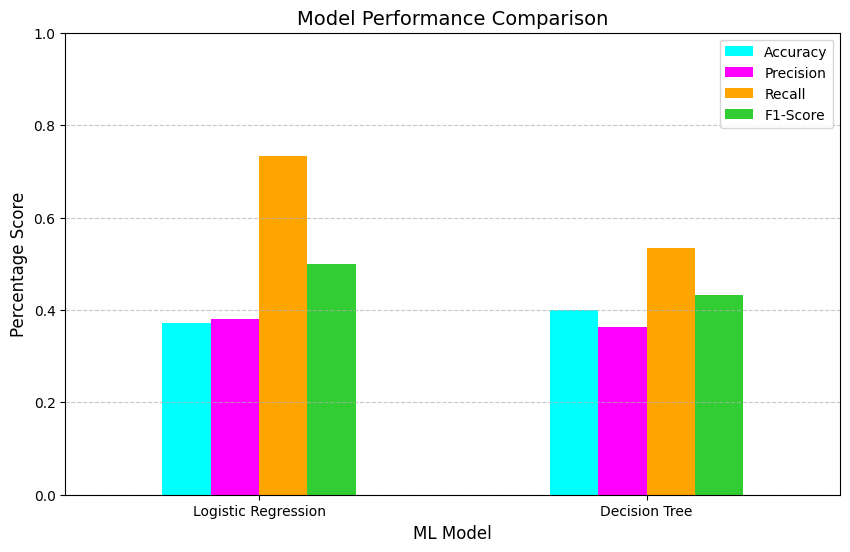

In [145]:
import matplotlib.pyplot as plt
results_chart = {
    'Accuracy': [logreg_accuracy, dt_accuracy],
    'Precision': [logreg_precision, dt_precision],
    'Recall': [logreg_recall, dt_recall],
    'F1-Score': [logreg_f1, dt_f1]
}
metrics_df = pd.DataFrame(results_chart, index=['Logistic Regression', 'Decision Tree'])
custom_colors = ['#00FFFF', '#FF00FF', '#FFA500', '#32CD32']

ax = metrics_df.plot(kind='bar', figsize=(10, 6), color = custom_colors)

plt.title('Model Performance Comparison', fontsize=14)
plt.ylabel('Percentage Score', fontsize=12)
plt.xlabel('ML Model', fontsize=12)
plt.ylim(0, 1)
plt.xticks(rotation=0)
plt.legend(loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

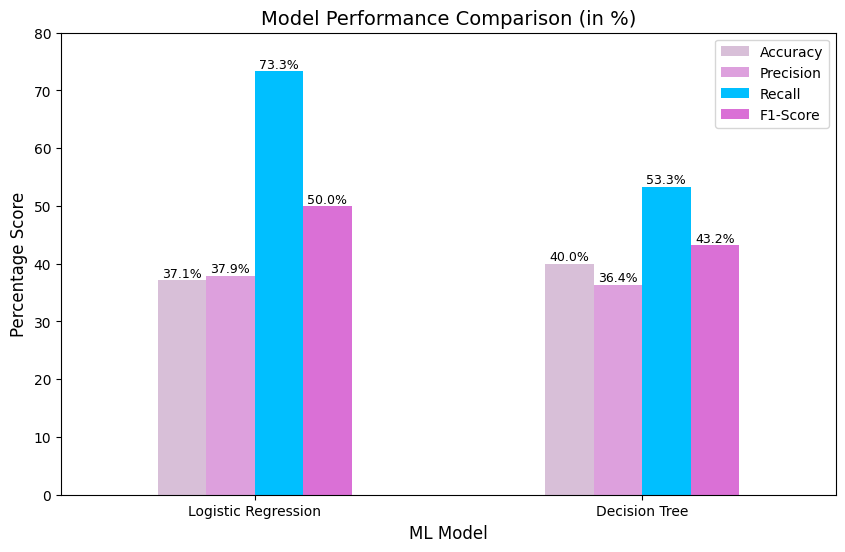

In [144]:
import matplotlib.pyplot as plt
import pandas as pd

# Prepare data in percentages
results_chart = {
    'Accuracy': [logreg_accuracy * 100, dt_accuracy * 100],
    'Precision': [logreg_precision * 100, dt_precision * 100],
    'Recall': [logreg_recall * 100, dt_recall * 100],
    'F1-Score': [logreg_f1 * 100, dt_f1 * 100]
}

metrics_df = pd.DataFrame(results_chart, index=['Logistic Regression', 'Decision Tree'])
custom_colors = ['thistle', 'plum', 'deepskyblue', 'orchid']

ax = metrics_df.plot(kind='bar', figsize=(10, 6), color = custom_colors)
plt.title('Model Performance Comparison (in %)', fontsize=14)
plt.ylabel('Percentage Score', fontsize=12)
plt.xlabel('ML Model', fontsize=12)
plt.ylim(0, 80)
plt.xticks(rotation=0)
plt.legend(loc='upper right')
# plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate bar heights with percentage values
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=9, color='black')
plt.show()

In [146]:
from tabulate import tabulate
print(tabulate(results_df, headers='keys', tablefmt='pretty', showindex=False))

+---------------------+----------+-----------+--------+----------+
|        Model        | Accuracy | Precision | Recall | F1-Score |
+---------------------+----------+-----------+--------+----------+
| Logistic Regression |  37.14%  |  37.93%   | 73.33% |  50.00%  |
|    Decision Tree    |  40.00%  |  36.36%   | 53.33% |  43.24%  |
+---------------------+----------+-----------+--------+----------+


## Results Summary

| Metric             | Logistic Regression | Decision Tree |
| ------------------ | ------------------- | ------------- |
| **Accuracy**       | 37%                 | 40%           |
| **0-Class Recall** | 15%                 | 30%           |
| **1-Class Recall** | 67%                 | 53%           |

Class 0: Employees who won't quit (Attrition = 0)

Class 1: Employees who will quit (Attrition = 1)

Logistic Regression favored predicting class 1 (people leaving).

Decision Tree was slightly more balanced but still poor overall because of less data.

